# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
#Importing required libraries
from scipy import stats 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [3]:
#Here we select  𝛼  = 0.05
from scipy.stats             import ttest_1samp, ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
GPU1_N= np.size(GPU1)
GPU1_Xbar = np.mean(GPU1)
GPU1_S = np.std(GPU1, ddof=1)
GPU1_SE = GPU1_S/np.sqrt(GPU1_N)
print("What are the critical values?")
print("============================")
print("Sample Mean = %2.1f" %(GPU1_Xbar))
print("SD = %2.1f" %(GPU1_S))
print("Standard Error = ", GPU1_SE)
t_statistic, p_value = ttest_1samp(GPU1, GPU1_Xbar)
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)
print("P-Value is greater than 5% hence [Alternate Hypothesis] - Failed to the Reject Null.")

What are the critical values?
Sample Mean = 10.3
SD = 1.2
Standard Error =  0.3034196632775998
T-Statistic =  0.0
P-Value =  1.0
P-Value is greater than 5% hence [Alternate Hypothesis] - Failed to the Reject Null.


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [4]:
#Here we say 𝛼  = 0.05
t_statistic, p_value  =  stats.ttest_rel(GPU1, GPU2)
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)
print("P-Value is less than 5% hence [Null Hypothesis] - Reject Null.")

T-Statistic =  -2.5422940006896315
P-Value =  0.02346537162637542
P-Value is less than 5% hence [Null Hypothesis] - Reject Null.


## Question 3

He is trying a third GPU - GPU3.

In [5]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

###### Given

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

In [6]:
t_statistic, p_value  =  stats.ttest_rel(GPU1, GPU3)
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)
print("P-Value is greater than 5% hence [Alternate Hypothesis] - Failed to the Reject Null.")

T-Statistic =  -1.585355832526882
P-Value =  0.13520778142018045
P-Value is greater than 5% hence [Alternate Hypothesis] - Failed to the Reject Null.


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [7]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

###### Given - Mayank Gupta

Null Hypothesis : There is no significant difference between data sets with equal variances

Alternate Hypothesis : There is a significant difference

In [8]:
from scipy.stats import levene
print("What are the critical values?")
print("============================")
print("e1 Sample Mean = ", (np.mean(e1)))
print("e2 Sample Mean = ", (np.mean(e2)))
print("e3 Sample Mean = ", (np.mean(e3)))
print("\nRunning Levene Test")
print("===================")
t_statistic, p_value = levene(e1, e2, e3)
print("T-Statistic = ", t_statistic)
print("P-Value = ", p_value)
print("P-Value is greater than 5% hence [Alternate Hypothesis] - Failed to the Reject Null.")

What are the critical values?
e1 Sample Mean =  0.7537925
e2 Sample Mean =  1.69759475
e3 Sample Mean =  0.7444685

Running Levene Test
T-Statistic =  2.6741725711150446
P-Value =  0.12259792666001798
P-Value is greater than 5% hence [Alternate Hypothesis] - Failed to the Reject Null.


## Answer

We cannot depend on the result of ANOVA.

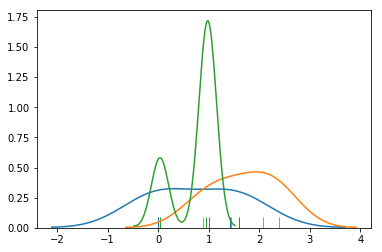


Running One-Way ANOVA Test
F-Value =  2.51357622845924
P-Value =  0.13574644501798466
P-Value is greater than 0.05 hence [Alternate Hypothesis] - Failed to Reject Null.


In [9]:
#Ploting distribution plot to verify the overlapping
sns.distplot(e1, hist=False, rug=True)
sns.distplot(e2, hist=False, rug=True)
sns.distplot(e3, hist=False, rug=True)
plt.show()

print("\nRunning One-Way ANOVA Test")
print("============================")
F, p = stats.f_oneway(e1, e2, e3)
print("F-Value = ", F)
print("P-Value = ", p)
print("P-Value is greater than 0.05 hence [Alternate Hypothesis] - Failed to Reject Null.")

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

###### Given - Mayank Gupta

Null Hypothesis : Two or more groups have the same population mean

H0: μ1 = μ2 = μ3 = μ4, all the means are the same

Alternate Hypothesis : Two or more groups do not have the same population mean

H1: two or more means are different from the others

Hypothesis at the α = 0.05 significance level.

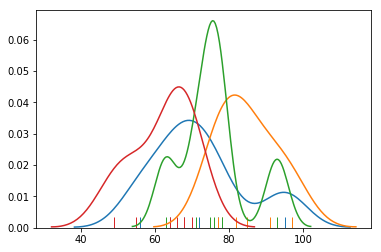


Running One-Way ANOVA Test
F-Value =  5.406342913776015
P-Value =  0.0068759477547351
P-Value is lesser than 0.05 hence [Null Hypothesis] - Reject Null.


In [10]:
import seaborn as sns
data1 = np.array([64,72,68,77,56,95])
data2 = np.array([78,91,97,82,85,77])
data3 = np.array([75,93,78,71,63,76])
data4 = np.array([55,66,49,64,70,68])
#Creating Matrix
data5 = [data1,data2,data3,data4]

#Ploting distribution plot to verify the overlapping
sns.distplot(data5[0], hist=False, rug=True)
sns.distplot(data5[1], hist=False, rug=True)
sns.distplot(data5[2], hist=False, rug=True)
sns.distplot(data5[3], hist=False, rug=True)
plt.show()

print("\nRunning One-Way ANOVA Test")
print("============================")
F, p = stats.f_oneway(data1, data2, data3, data4)
print("F-Value = ", F)
print("P-Value = ", p)
print("P-Value is lesser than 0.05 hence [Null Hypothesis] - Reject Null.")

## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

## Mayank Gupta:

Type I Error:

When you reject the Null Hypothesis and it trun out to be wrong test. A Type I error can only occur if H0 is true.

Type II Error:

When you failed to reject the Null Hypothesis and it turn out to be wrong test. A Type II error can only occur if H0 is false.


## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


## Mayank Gupta:

Null Hypothesis : Past month population mean has no significance difference from population mean


Alternate Hypothesis : There is a significant difference

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [11]:
import numpy as np
import pandas as pd

d1 = [5, 8, 3, 8]
d2 = [9, 6, 8, 5]
d3 = [8, 12, 7, 2]
d4 = [4, 16, 7, 3]
d5 = [3, 9, 6, 5]
d6 = [7, 2, 5, 7]
#Creating a matrix
dice = np.array([d1, d2, d3, d4, d5, d6])

print("Player1 - Total Dice Rolls = ",np.sum(dice[:,0:1]))
print("Player2 - Total Dice Rolls = ",np.sum(dice[:,1:2]))
print("Player3 - Total Dice Rolls = ",np.sum(dice[:,2:3]))
print("Player4 - Total Dice Rolls = ",np.sum(dice[:,3:4]))
print("Total Dice Rolls = ",np.sum(dice))

Player1 - Total Dice Rolls =  36
Player2 - Total Dice Rolls =  53
Player3 - Total Dice Rolls =  36
Player4 - Total Dice Rolls =  30
Total Dice Rolls =  155


In [12]:
#For understanding purpose creating a data frame
df_PlayersDiceRoll = pd.DataFrame(dice)
DiceNum = ['One', 'Two', 'Three', 'Four', 'Five', 'Six'] 
df_PlayersDiceRoll["Dice"] = DiceNum
df_PlayersDiceRoll = df_PlayersDiceRoll.rename(columns={0: 'Player1', 1: 'Player2', 2: 'Player3', 3: 'Player4'})
df_PlayersDiceRoll

,Player1,Player2,Player3,Player4,Dice
0,5,8,3,8,One
1,9,6,8,5,Two
2,8,12,7,2,Three
3,4,16,7,3,Four
4,3,9,6,5,Five
5,7,2,5,7,Six


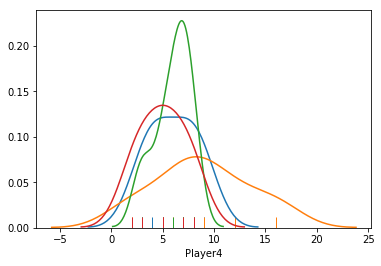

In [13]:
#Ploting distribution plot to verify the overlapping
sns.distplot(df_PlayersDiceRoll["Player1"], hist=False, rug=True)
sns.distplot(df_PlayersDiceRoll["Player2"], hist=False, rug=True)
sns.distplot(df_PlayersDiceRoll["Player3"], hist=False, rug=True)
sns.distplot(df_PlayersDiceRoll["Player4"], hist=False, rug=True)
plt.show()

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



In [14]:
#Running a Chi Square Test and Displaying respective results
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
print("Chi2 Statistics =", chi2_stat)
print("Degrees of Freedom = ", dof)
print("P-Value = ", p_val)
print("\nContingency Table: \n", ex)

Chi2 Statistics = 23.315671914716496
Degrees of Freedom =  15
P-Value =  0.07766367301496693

Contingency Table: 
 [[ 5.57419355  8.20645161  5.57419355  4.64516129]
 [ 6.50322581  9.57419355  6.50322581  5.41935484]
 [ 6.73548387  9.91612903  6.73548387  5.61290323]
 [ 6.96774194 10.25806452  6.96774194  5.80645161]
 [ 5.34193548  7.86451613  5.34193548  4.4516129 ]
 [ 4.87741935  7.18064516  4.87741935  4.06451613]]


## Mayank Gupta - Since the P-Value is equal to .078 which is much higher than .01 threshold; we conclude that we failed to reject the Null Hypothesis

## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

In [15]:
z_scores = stats.zscore(dice, axis=1, ddof=1)
p_values = stats.norm.sf(abs(z_scores))
print("ZScore")
print("======")
print(z_scores)
print("P-Value")
print("=======")
print(p_values)
print("P Mean")
print("======")
print(np.mean(p_values))

ZScore
[[-0.40824829  0.81649658 -1.22474487  0.81649658]
 [ 1.09544512 -0.54772256  0.54772256 -1.09544512]
 [ 0.1823492   1.15487828 -0.06078307 -1.27644442]
 [-0.59160798  1.43676223 -0.08451543 -0.76063883]
 [-1.1         1.3         0.1        -0.3       ]
 [ 0.7406129  -1.37542395 -0.10580184  0.7406129 ]]
P-Value
[[0.3415457  0.20710809 0.11033568 0.20710809]
 [0.13666084 0.29194121 0.29194121 0.13666084]
 [0.42765434 0.12407014 0.47576599 0.10089923]
 [0.27705657 0.07539278 0.46632332 0.22343641]
 [0.13566606 0.09680048 0.46017216 0.38208858]
 [0.22946409 0.08450002 0.45786979 0.22946409]]
P Mean
0.2487469049916935


## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [16]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

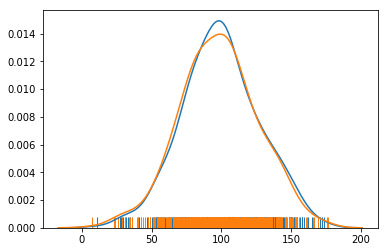

In [17]:
#Ploting distribution plot to validate normal distribution and overlapping
sns.distplot(before, hist=False, rug=True)
sns.distplot(after, hist=False, rug=True)
plt.show()

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.

## Step 1: Define null and alternative hypotheses

In testing whether after "after method has any effect , the null hypothesis states that, 𝜇𝐴𝑓𝑡𝑒𝑟 equals 𝜇𝐵𝑒𝑓𝑜𝑟𝑒. The alternative hypthesis states that difference in data is more than 0, 𝜇𝐴𝑓𝑡𝑒𝑟 ≠ 𝜇𝐵𝑒𝑓𝑜𝑟𝑒

𝐻0: 𝜇𝐴𝑓𝑡𝑒𝑟 - 𝜇𝐵𝑒𝑓𝑜𝑟𝑒 = 0
𝐻𝐴: 𝜇𝐴𝑓𝑡𝑒𝑟 - 𝜇𝐵𝑒𝑓𝑜𝑟𝑒 ≠ 0

## Step 2: Decide the significance level

Here we select 𝛼 = 0.05 and sample size = 500 and population standard deviation is not known.

## Step 3: Identify the test statistic
Sample sizes for both samples are same.
We have two paired samples and we do not know the population standard deviation.

## Step 4: Calculate the p - value and test statistic

In [18]:
print("Running the two paired samples TTest")
print("====================================")
t_statistic, p_value  =  stats.ttest_rel(after, before)
print("T-Statistic = ", t_statistic)
print("P Value = %1.3f" %(p_value))
print("P-Value is less than 5% hence [Null Hypothesis] - Reject Null.")

Running the two paired samples TTest
T-Statistic =  -5.7202992139876825
P Value = 0.000
P-Value is less than 5% hence [Null Hypothesis] - Reject Null.


## Step 5: Decide to reject or accept Null Hypothesis
In this example, p value is 0.000 and it is less than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So there is sufficient evidence to reject the null hypothesis